In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import pathlib2

In [2]:
ablation_files = glob.glob('/raid/COVID-19/CT-severity/results/Iran-2020-04-01-with-annotation/unet2d_256x256x7_mask/em/bias_*_scale_*/log/ablation.csv')

In [3]:
df_list = []
for filename in ablation_files:
    df = pd.read_csv(filename)
    config_name = os.path.basename(str(pathlib2.Path(filename).parents[1]))
    tokens = config_name.split('_')
    df['bias'] = [float(tokens[1])]
    df['scale'] = [float(tokens[3])]
    df_list.append(df)
df_all = pd.concat(df_list)

In [4]:
df_all

,dice,sensitivity,specificity,bias,scale
0,0.484812,0.684937,0.948022,-7.0,0.25
0,0.595524,0.651280,0.977037,-7.0,0.50
0,0.580688,0.667072,0.972646,-7.0,0.75
0,0.613704,0.627341,0.983142,-7.0,1.00
0,0.510537,0.638836,0.959545,-7.5,0.25
0,0.567434,0.651754,0.971329,-7.5,0.50
0,0.570688,0.625859,0.975375,-7.5,0.75
0,0.585611,0.637740,0.975233,-7.5,1.00
0,0.523135,0.653384,0.959436,-8.0,0.25
0,0.540874,0.654243,0.966953,-8.0,0.50


In [7]:
th_dice = 0.5300540329233202
th_sensitivity = 0.4214268784072055
th_specificity = 0.994220295654107

df_em = df_all[df_all.scale < 0]
em_dice = np.max(df_em.dice)

In [27]:
-bias_unique * 110 - 1024

array([  21.,  -34.,  -89., -144.])

Text(0,0.5,'Dice')

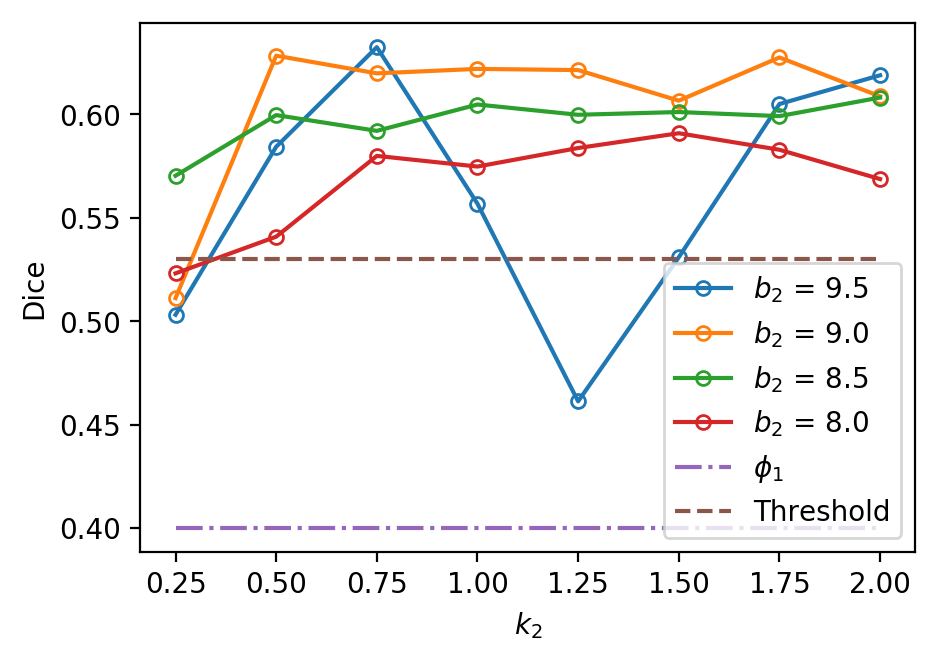

In [21]:
# plot dice
df_dice = df_all[df_all.scale > 0]
bias_unique = np.sort(np.unique(df_dice.bias))[:4]
plt.figure(figsize=[5,3.5], dpi=200)
for bias in bias_unique:
    df_sub = df_dice[df_dice.bias == bias].sort_values('scale')
    plt.plot(df_sub.scale, df_sub.dice, 'o-', markersize=5, fillstyle='none')

plt.plot([0.25, 2], [em_dice, em_dice], '-.')
plt.plot([0.25, 2], [th_dice, th_dice], '--')

legends = ['$b_2$ = %.1f'%s for s in -bias_unique]
plt.legend(legends + ['$\phi_1$', 'Threshold'])
plt.xlabel('$k_2$')
plt.ylabel('Dice')

In [9]:
# fit the ROC with binormal function See 
# Metz, C.E. and Pan, X., 1999. “Proper” binormal ROC curves: theory and maximum-likelihood estimation. Journal of mathematical psychology, 43(1), pp.1-33.
# the proper method is too complicated, we use a simple binormal version here:
# Dorfman, D.D. and Alf Jr, E., 1969. Maximum-likelihood estimation of parameters of signal-detection theory and determination of confidence intervals—rating-method data. Journal of mathematical psychology, 6(3), pp.487-496.

import scipy.stats
import scipy.optimize
from functools import partial

def binormal_roc(x,a,b):
    return scipy.stats.norm.cdf(-x), scipy.stats.norm.cdf(a - b * x)

def binormal_loss(x, tps, fps):
    a = x[0]
    b = x[1]
    x = x[2:]
    
    fps_pred, tps_pred = binormal_roc(x, a, b)
    
    return (np.mean((fps_pred - fps)**2) + np.mean((tps_pred - tps)**2)) / 2

def gamma_loss(x, tps, fps):
    return np.mean((fps**x - tps)**2)

tps = np.array(df_dice.sensitivity)
fps = 1 - np.array(df_dice.specificity)
x0 = 1
x = scipy.optimize.minimize(partial(gamma_loss, tps = tps, fps = fps), x0)
# x0 = np.array([0.5, 0.75] + [0.25] * (len(tps)))
# x = scipy.optimize.minimize(partial(binormal_loss, tps = tps, fps = fps), x0)

(0, 0.05)

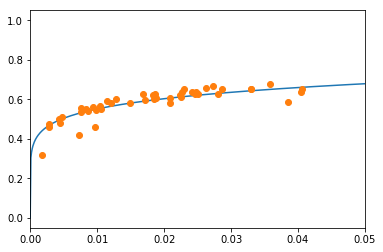

In [10]:
# plot the roc curve
# a = x.x[0]
# b = x.x[1]
t = np.arange(-10, 10, 0.01)
t0 = np.arange(0, 1.0001, 0.0001)
# roc_x, roc_y = binormal_roc(t, a, b)
# plt.plot(roc_x, roc_y)
plt.plot(t0, t0**x.x)
plt.plot(fps, tps, 'o')
plt.xlim([0,0.05])

Text(0,0.5,'True Positive Rate')

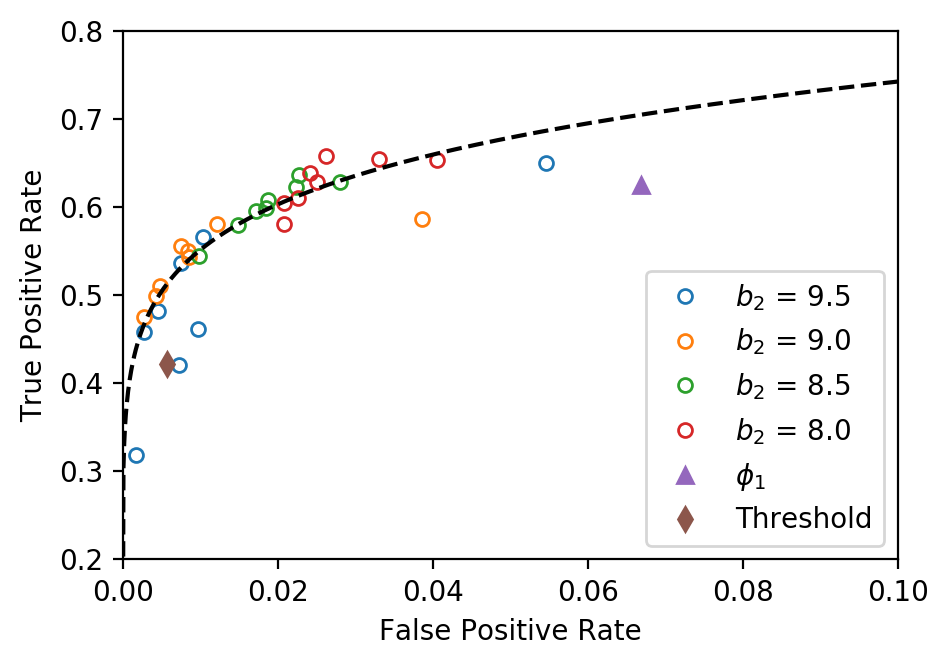

In [17]:
# plot sensitivity / specificity
df_dice = df_all[df_all.scale > 0]
bias_unique = np.sort(np.unique(df_dice.bias))[:4]
plt.figure(figsize=[5,3.5], dpi=200)
for bias in bias_unique:
    df_sub = df_dice[df_dice.bias == bias].sort_values('scale')
    plt.plot(1 - df_sub.specificity, df_sub.sensitivity, 'o', markersize=5, fillstyle='none')
# plt.plot(1 - df_em.specificity, df_em.sensitivity, '^')
plt.plot(1 - 0.933122, 0.624733, '^')
plt.plot(1 - th_specificity, th_sensitivity, 'd')

plt.plot(t0, t0**x.x, 'k--')
plt.xlim([0, 0.1])
plt.ylim([0.2, 0.8])

legends = ['$b_2$ = %.1f'%s for s in -bias_unique]
plt.legend(legends + ['$\phi_1$', 'Threshold'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')